In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

In [2]:
file_path = "../data/train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-01,Delhi,Cochin,20:00:00,04:25:00,505,2.0,No Info,16263
1,Air India,2019-05-18,Delhi,Cochin,12:00:00,07:40:00,1180,2.0,No Info,8603
2,Indigo,2019-06-18,Mumbai,Hyderabad,21:20:00,22:50:00,90,0.0,No Info,2227
3,Jet Airways,2019-06-27,Delhi,Cochin,15:00:00,19:00:00,1680,1.0,In-flight meal not included,10262
4,Jet Airways,2019-05-01,Kolkata,Banglore,06:30:00,18:15:00,705,1.0,In-flight meal not included,10844
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-24,Kolkata,Banglore,22:15:00,00:50:00,155,0.0,No Info,4804
636,Jet Airways,2019-03-21,Delhi,Cochin,19:45:00,18:50:00,1385,1.0,No Info,12347
637,Jet Airways,2019-05-18,Kolkata,Banglore,14:05:00,19:50:00,345,1.0,No Info,14781
638,Air India,2019-06-06,Delhi,Cochin,07:00:00,19:15:00,735,1.0,No Info,8669


In [3]:
!pip install wordcloud



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [6]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-01,Delhi,Cochin,2025-08-12 20:00:00,2025-08-12 04:25:00,505,2.0,No Info,16263
1,Air India,2019-05-18,Delhi,Cochin,2025-08-12 12:00:00,2025-08-12 07:40:00,1180,2.0,No Info,8603
2,Indigo,2019-06-18,Mumbai,Hyderabad,2025-08-12 21:20:00,2025-08-12 22:50:00,90,0.0,No Info,2227
3,Jet Airways,2019-06-27,Delhi,Cochin,2025-08-12 15:00:00,2025-08-12 19:00:00,1680,1.0,In-flight meal not included,10262
4,Jet Airways,2019-05-01,Kolkata,Banglore,2025-08-12 06:30:00,2025-08-12 18:15:00,705,1.0,In-flight meal not included,10844
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-24,Kolkata,Banglore,2025-08-12 22:15:00,2025-08-12 00:50:00,155,0.0,No Info,4804
636,Jet Airways,2019-03-21,Delhi,Cochin,2025-08-12 19:45:00,2025-08-12 18:50:00,1385,1.0,No Info,12347
637,Jet Airways,2019-05-18,Kolkata,Banglore,2025-08-12 14:05:00,2025-08-12 19:50:00,345,1.0,No Info,14781
638,Air India,2019-06-06,Delhi,Cochin,2025-08-12 07:00:00,2025-08-12 19:15:00,735,1.0,No Info,8669


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [8]:
train.describe(include="number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,648.203125,0.807813,8941.143750
std,517.713514,0.684459,4599.265511
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5087.250000
50%,520.000000,1.000000,8029.000000
75%,948.750000,1.000000,12173.000000
max,2280.000000,4.000000,31825.000000


In [9]:
(
	train
	.assign(total_stops=train["total_stops"].astype(object))
	.describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,8,5,6,5.0,5
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,210,263,263,334.0,513


In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [11]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [12]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-06-01,Delhi,Cochin,2025-08-12 20:00:00,2025-08-12 04:25:00,505,2.0,No Info,16263,-1
1,Air India,2019-05-18,Delhi,Cochin,2025-08-12 12:00:00,2025-08-12 07:40:00,1180,2.0,No Info,8603,-1
2,Indigo,2019-06-18,Mumbai,Hyderabad,2025-08-12 21:20:00,2025-08-12 22:50:00,90,0.0,No Info,2227,-1
3,Jet Airways,2019-06-27,Delhi,Cochin,2025-08-12 15:00:00,2025-08-12 19:00:00,1680,1.0,In-flight meal not included,10262,-1
5,Vistara,2019-06-09,Kolkata,Banglore,2025-08-12 17:00:00,2025-08-12 18:50:00,1550,1.0,No Info,9135,-1
...,...,...,...,...,...,...,...,...,...,...,...
623,Air India,2019-06-01,Delhi,Cochin,2025-08-12 17:15:00,2025-08-12 19:15:00,1560,2.0,No Info,12970,-1
625,Jet Airways,2019-06-15,Delhi,Cochin,2025-08-12 11:45:00,2025-08-12 12:35:00,1490,2.0,No Info,13882,-1
629,Spicejet,2019-06-21,Mumbai,Hyderabad,2025-08-12 05:45:00,2025-08-12 07:15:00,90,0.0,No check-in baggage included,2647,-1
633,Vistara,2019-04-01,Kolkata,Banglore,2025-08-12 20:20:00,2025-08-12 23:25:00,1625,1.0,No Info,7927,-1


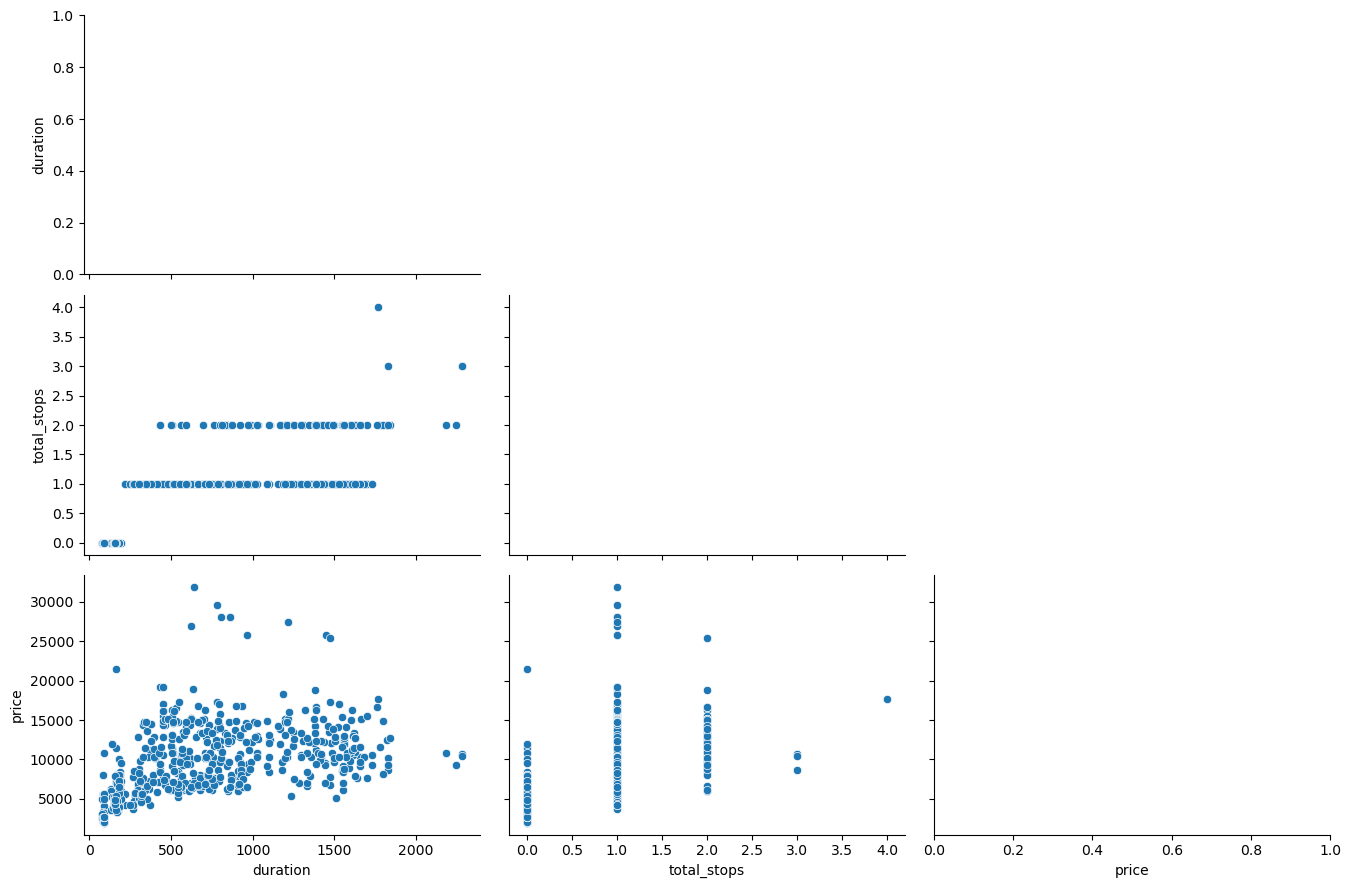

In [13]:
eda_helper_functions.pair_plots(train)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


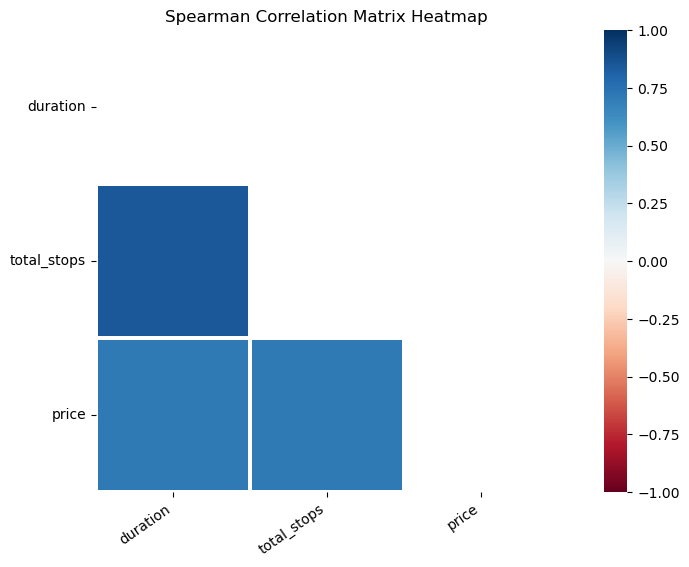

In [14]:
eda_helper_functions.correlation_heatmap(train)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


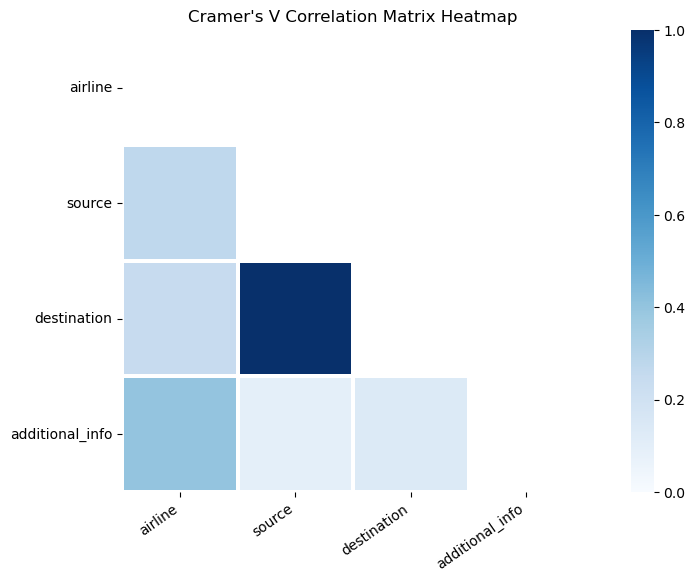

In [15]:
eda_helper_functions.cramersV_heatmap(train)

In [16]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [17]:
train.airline

0      Jet Airways
1        Air India
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635         Indigo
636    Jet Airways
637    Jet Airways
638      Air India
639         Indigo
Name: airline, Length: 640, dtype: object

In [18]:
eda_helper_functions.cat_summary(train, "airline")

0      Jet Airways
1        Air India
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635         Indigo
636    Jet Airways
637    Jet Airways
638      Air India
639         Indigo
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,210


,count,percentage
category,,
Jet Airways,210,0.328125
Indigo,127,0.198437
Air India,115,0.179688
Multiple Carriers,78,0.121875
Spicejet,44,0.068750
Vistara,33,0.051562
Air Asia,20,0.031250
Goair,13,0.020313


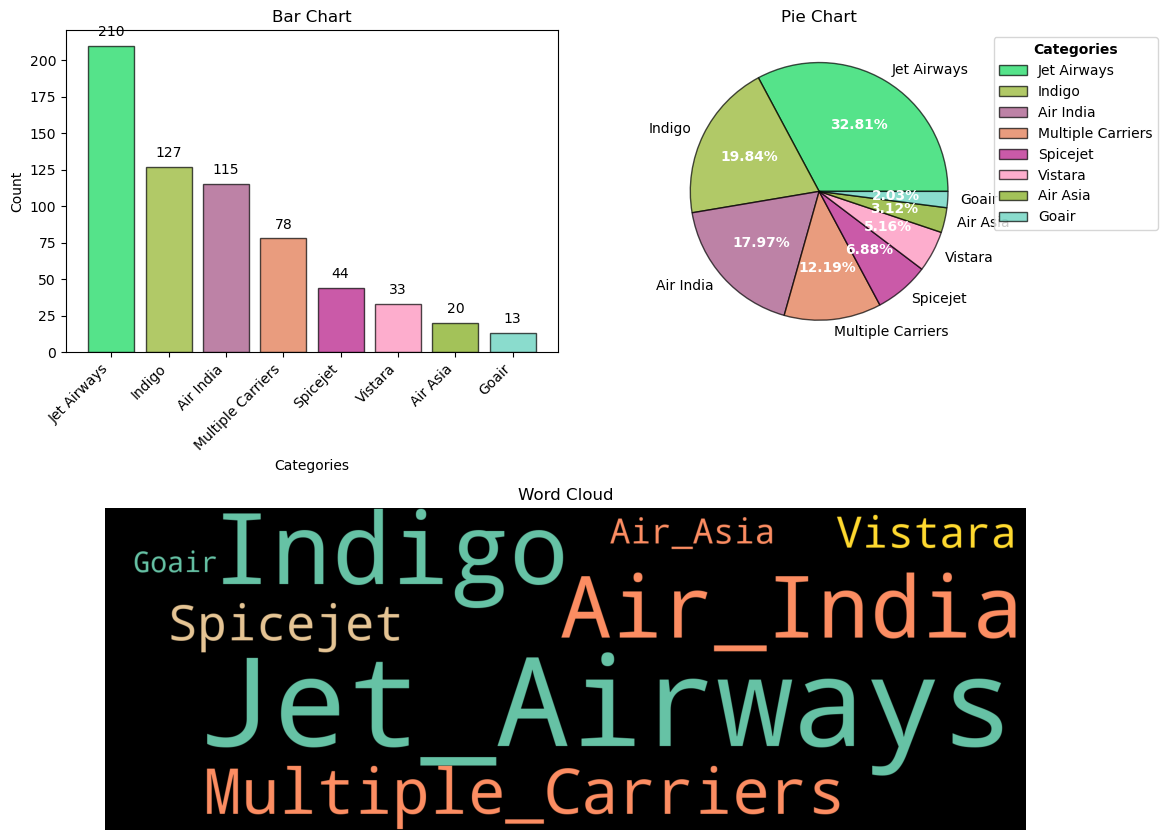

In [19]:
eda_helper_functions.cat_univar_plots(train, "airline")

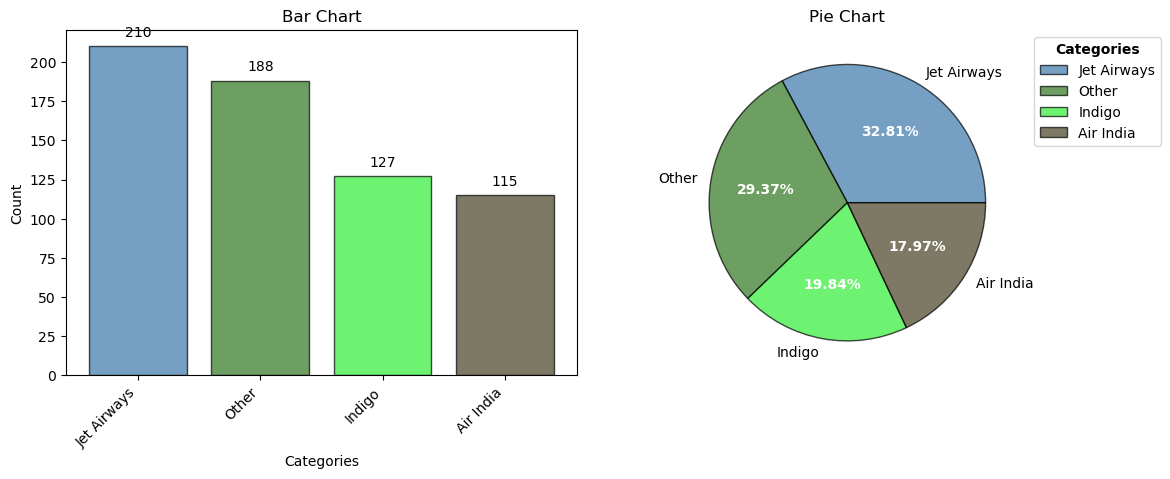

In [20]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

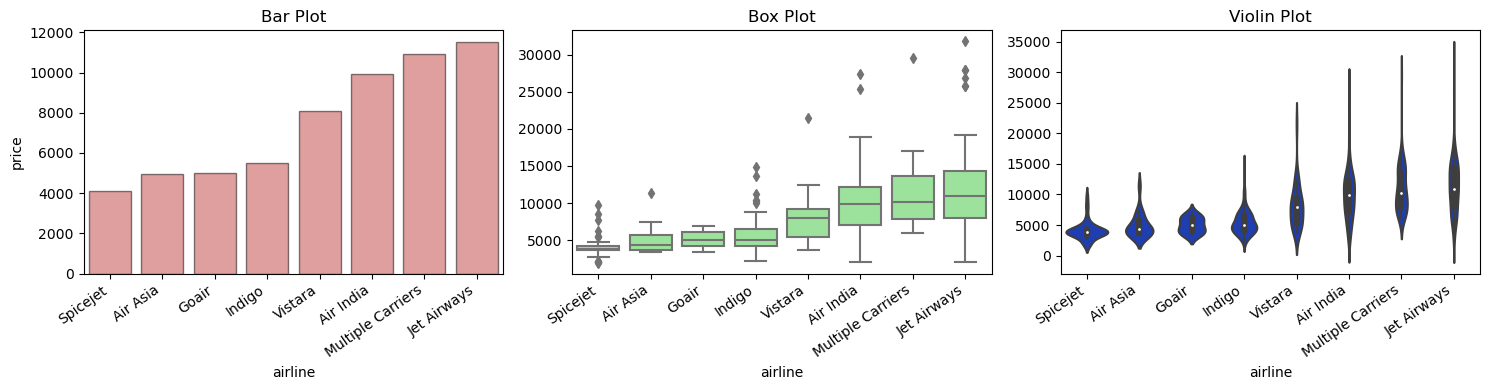

In [21]:
eda_helper_functions.num_cat_bivar_plots(
	data=train,
	num_var="price",
	cat_var="airline"
)

In [22]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 51.26586195876597
- p-value              : 8.385461911427548e-58
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 295.3817139759812
- p-value              : 5.859319060205783e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


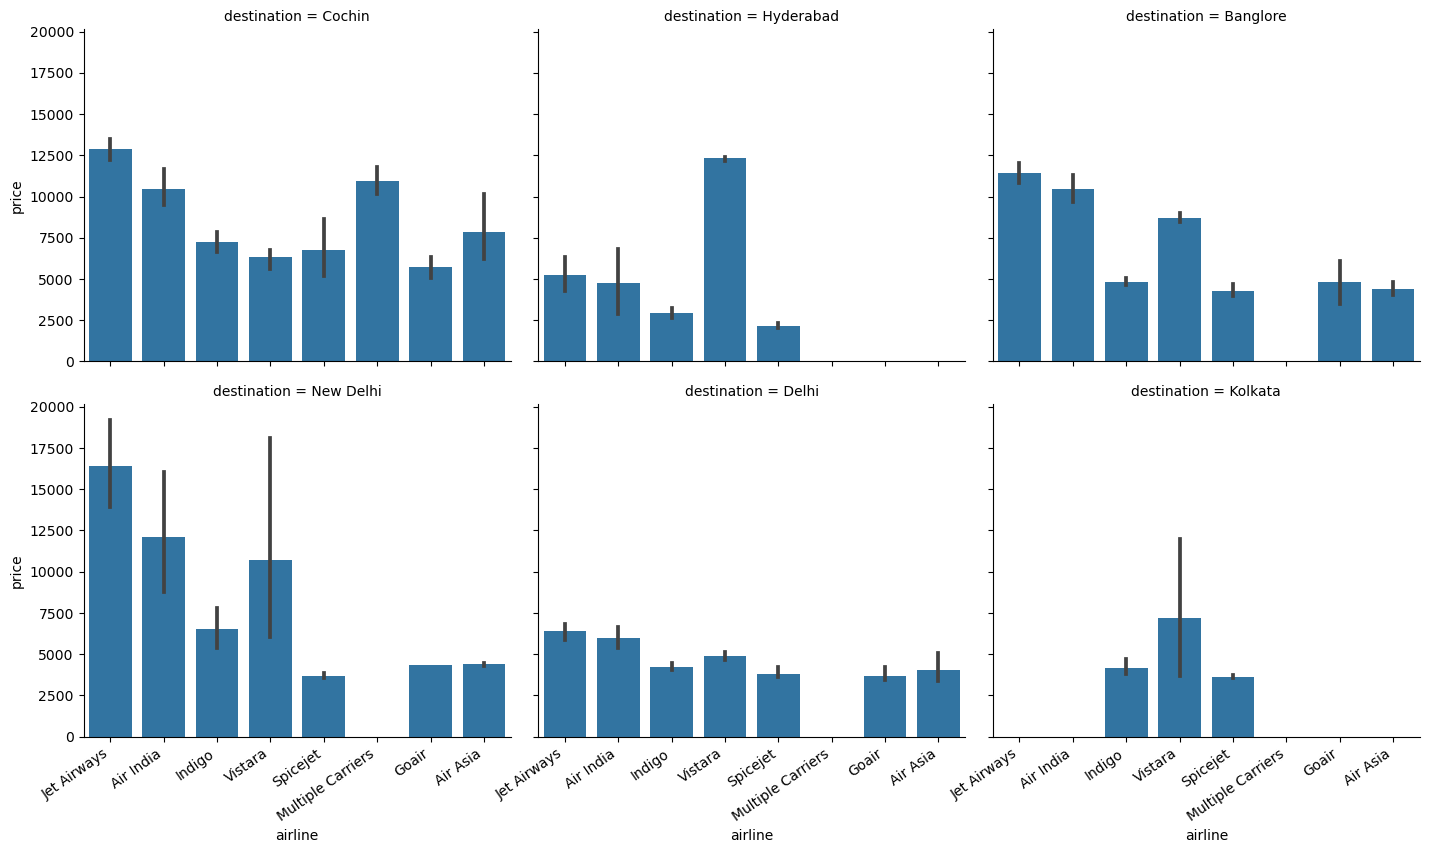

In [23]:
airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
	eda_helper_functions.rotate_xlabels(ax)

In [24]:
train.date_of_journey

0     2019-06-01
1     2019-05-18
2     2019-06-18
3     2019-06-27
4     2019-05-01
         ...    
635   2019-05-24
636   2019-03-21
637   2019-05-18
638   2019-06-06
639   2019-03-03
Name: date_of_journey, Length: 640, dtype: datetime64[ns]

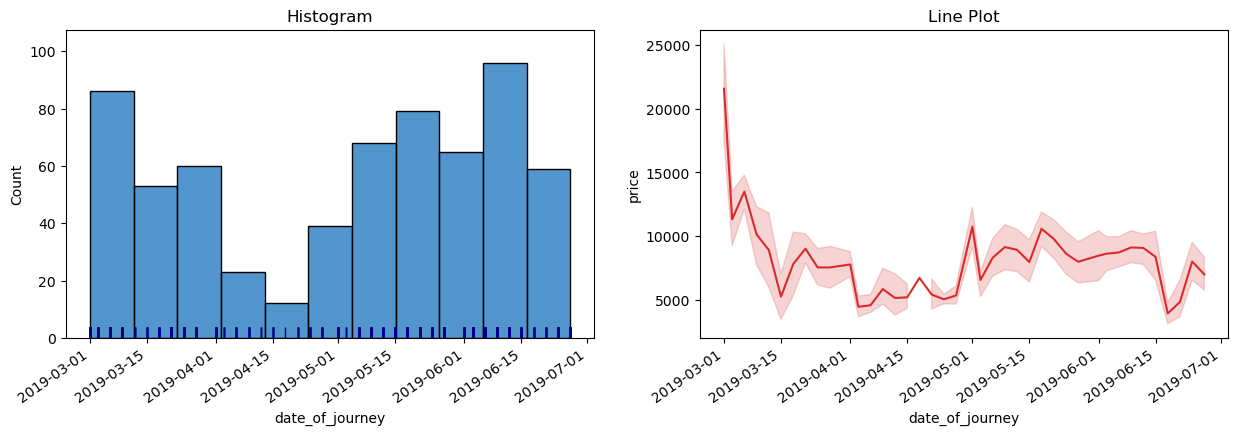

In [25]:
eda_helper_functions.dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

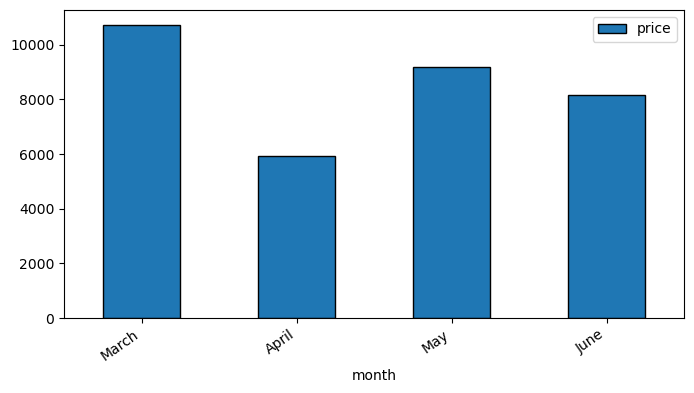

In [26]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

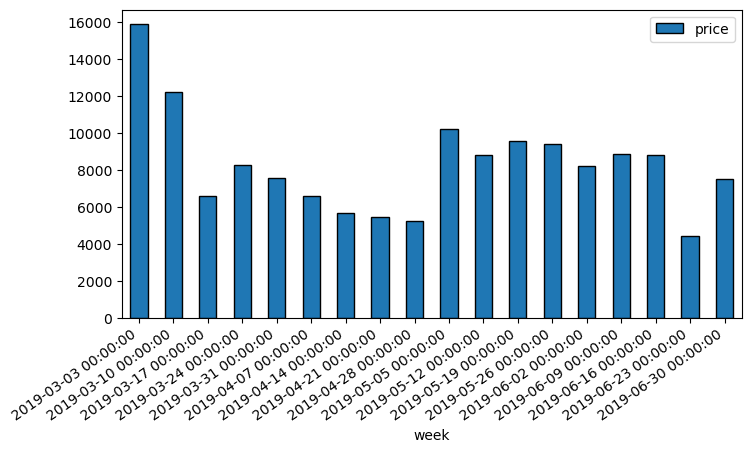

In [27]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

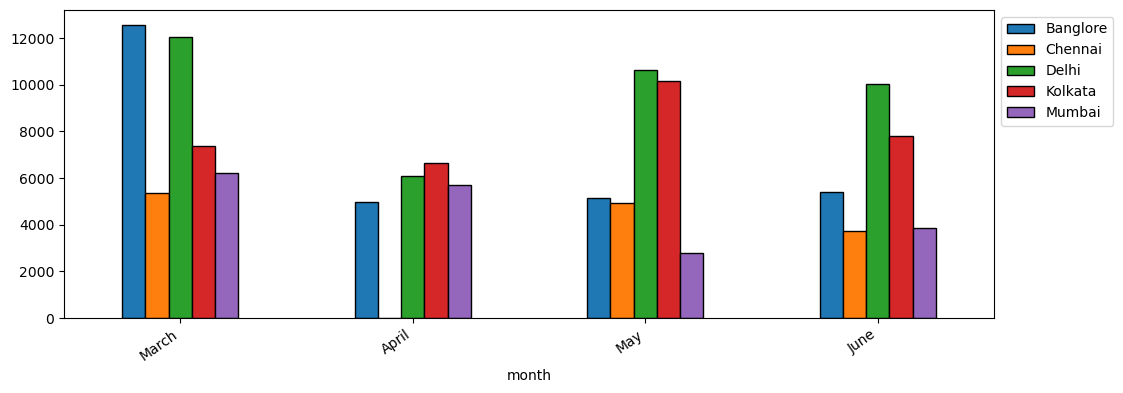

In [28]:
(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

In [29]:
train.dep_time

0     2025-08-12 20:00:00
1     2025-08-12 12:00:00
2     2025-08-12 21:20:00
3     2025-08-12 15:00:00
4     2025-08-12 06:30:00
              ...        
635   2025-08-12 22:15:00
636   2025-08-12 19:45:00
637   2025-08-12 14:05:00
638   2025-08-12 07:00:00
639   2025-08-12 20:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

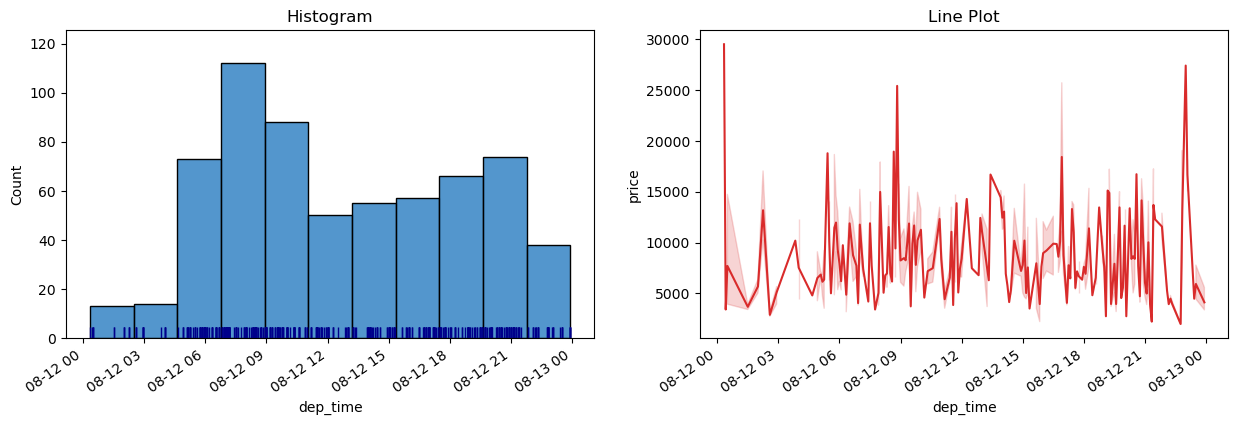

In [30]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

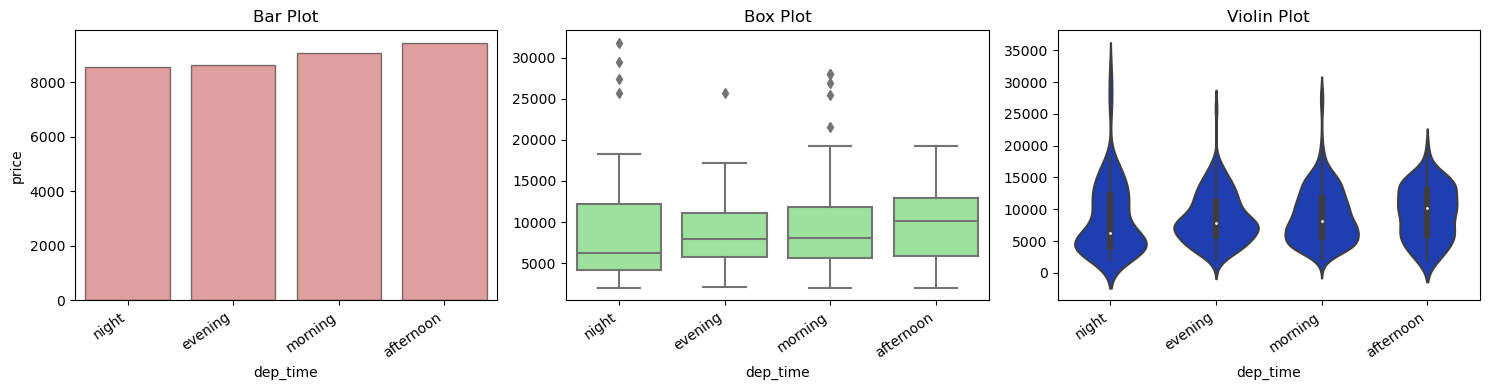

In [31]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

In [32]:
train.duration

0       505
1      1180
2        90
3      1680
4       705
       ... 
635     155
636    1385
637     345
638     735
639     305
Name: duration, Length: 640, dtype: int64

In [33]:
eda_helper_functions.num_summary(train, "duration")

0       505
1      1180
2        90
3      1680
4       705
       ... 
635     155
636    1385
637     345
638     735
639     305
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,520.00
75,948.75
90,1495.00
95,1615.25
99,1830.00


,value
mean,648.203125
trimmed mean (5%),616.579861
trimmed mean (10%),588.037109
median,520.000000


,value
var,268027.282619
std,517.713514
IQR,778.750000
mad,355.000000
coef_variance,0.798690


,value
skewness,0.811028
kurtosis,-0.407952


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.2758323908092794e-21
Test Statistic       : 0.8824178576469421
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 25.573259885258267
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [34]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    520.00
0.75    948.75
Name: duration, dtype: float64

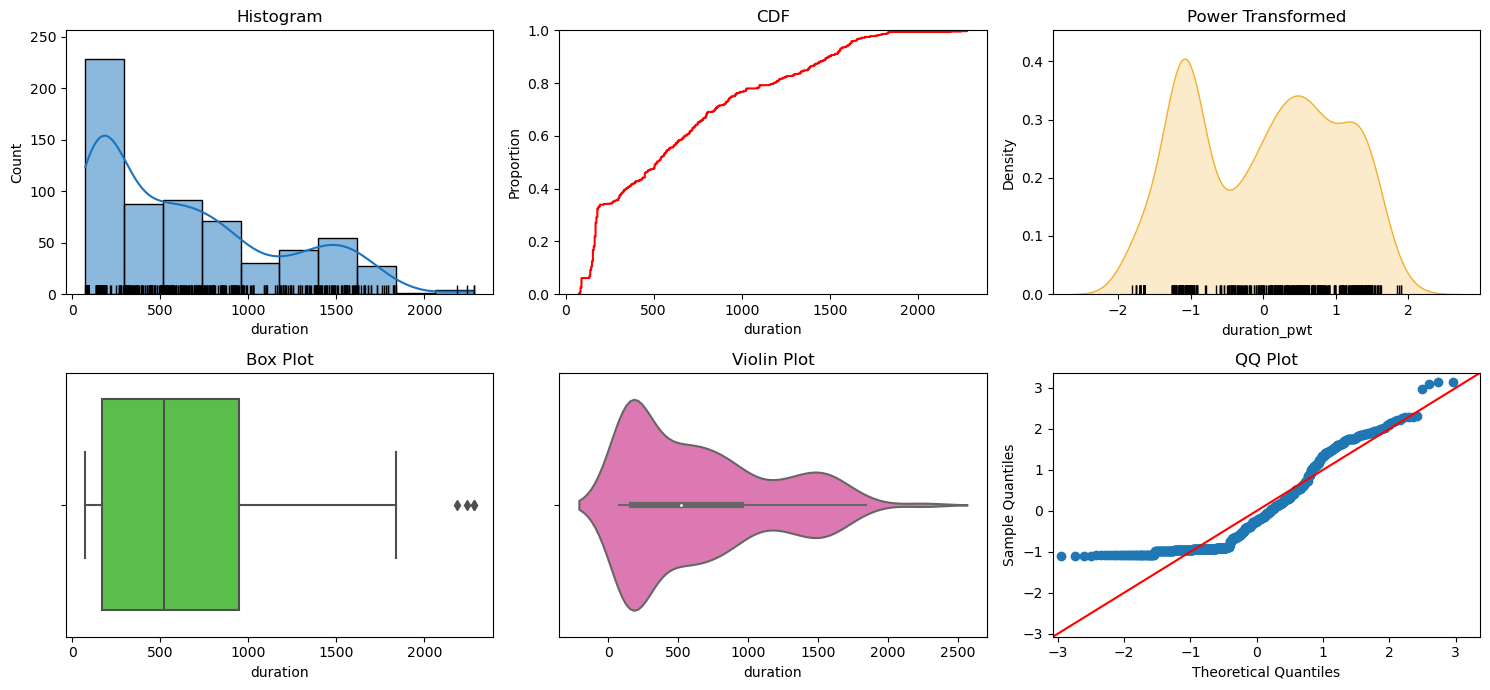

In [35]:
eda_helper_functions.num_univar_plots(train, "duration")

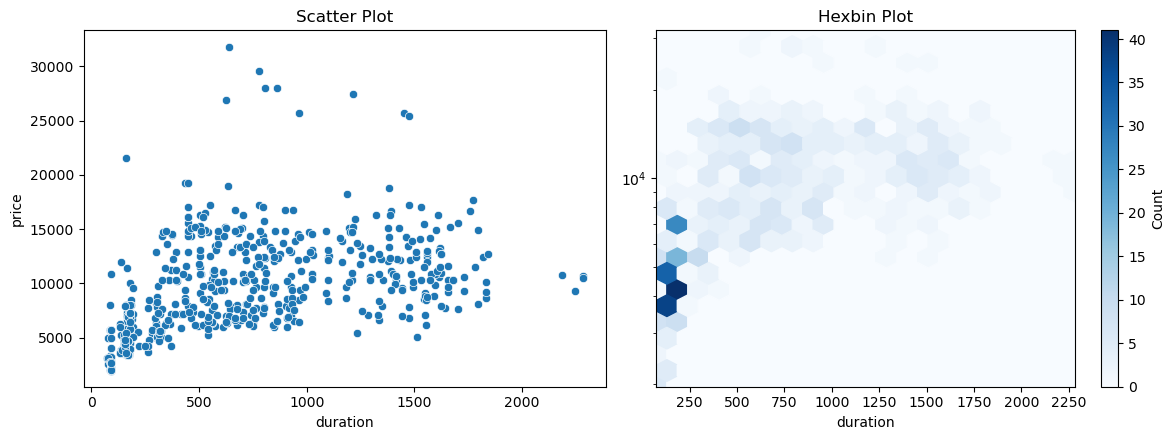

In [36]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [37]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5369407914563827
- p-value              : 4.4612043646984924e-49
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.7135669568572858
- p-value              : 1.1222552955441903e-100
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


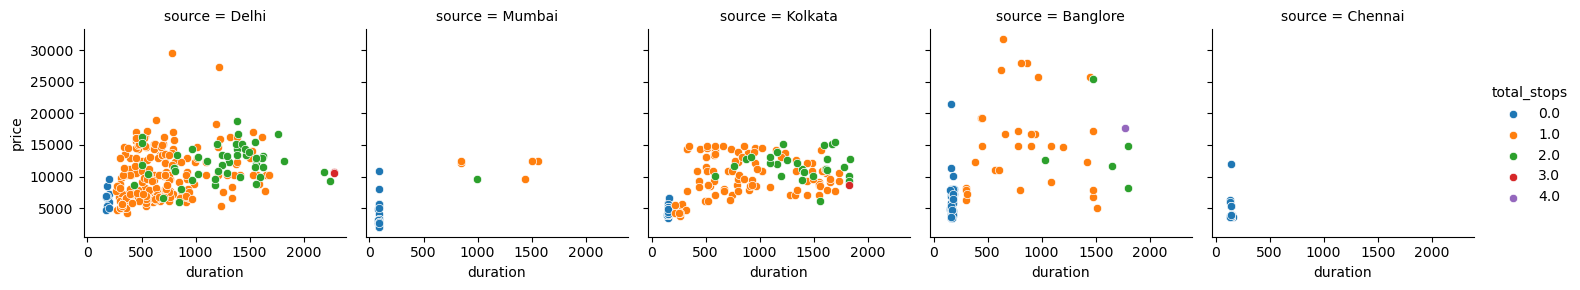

In [38]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

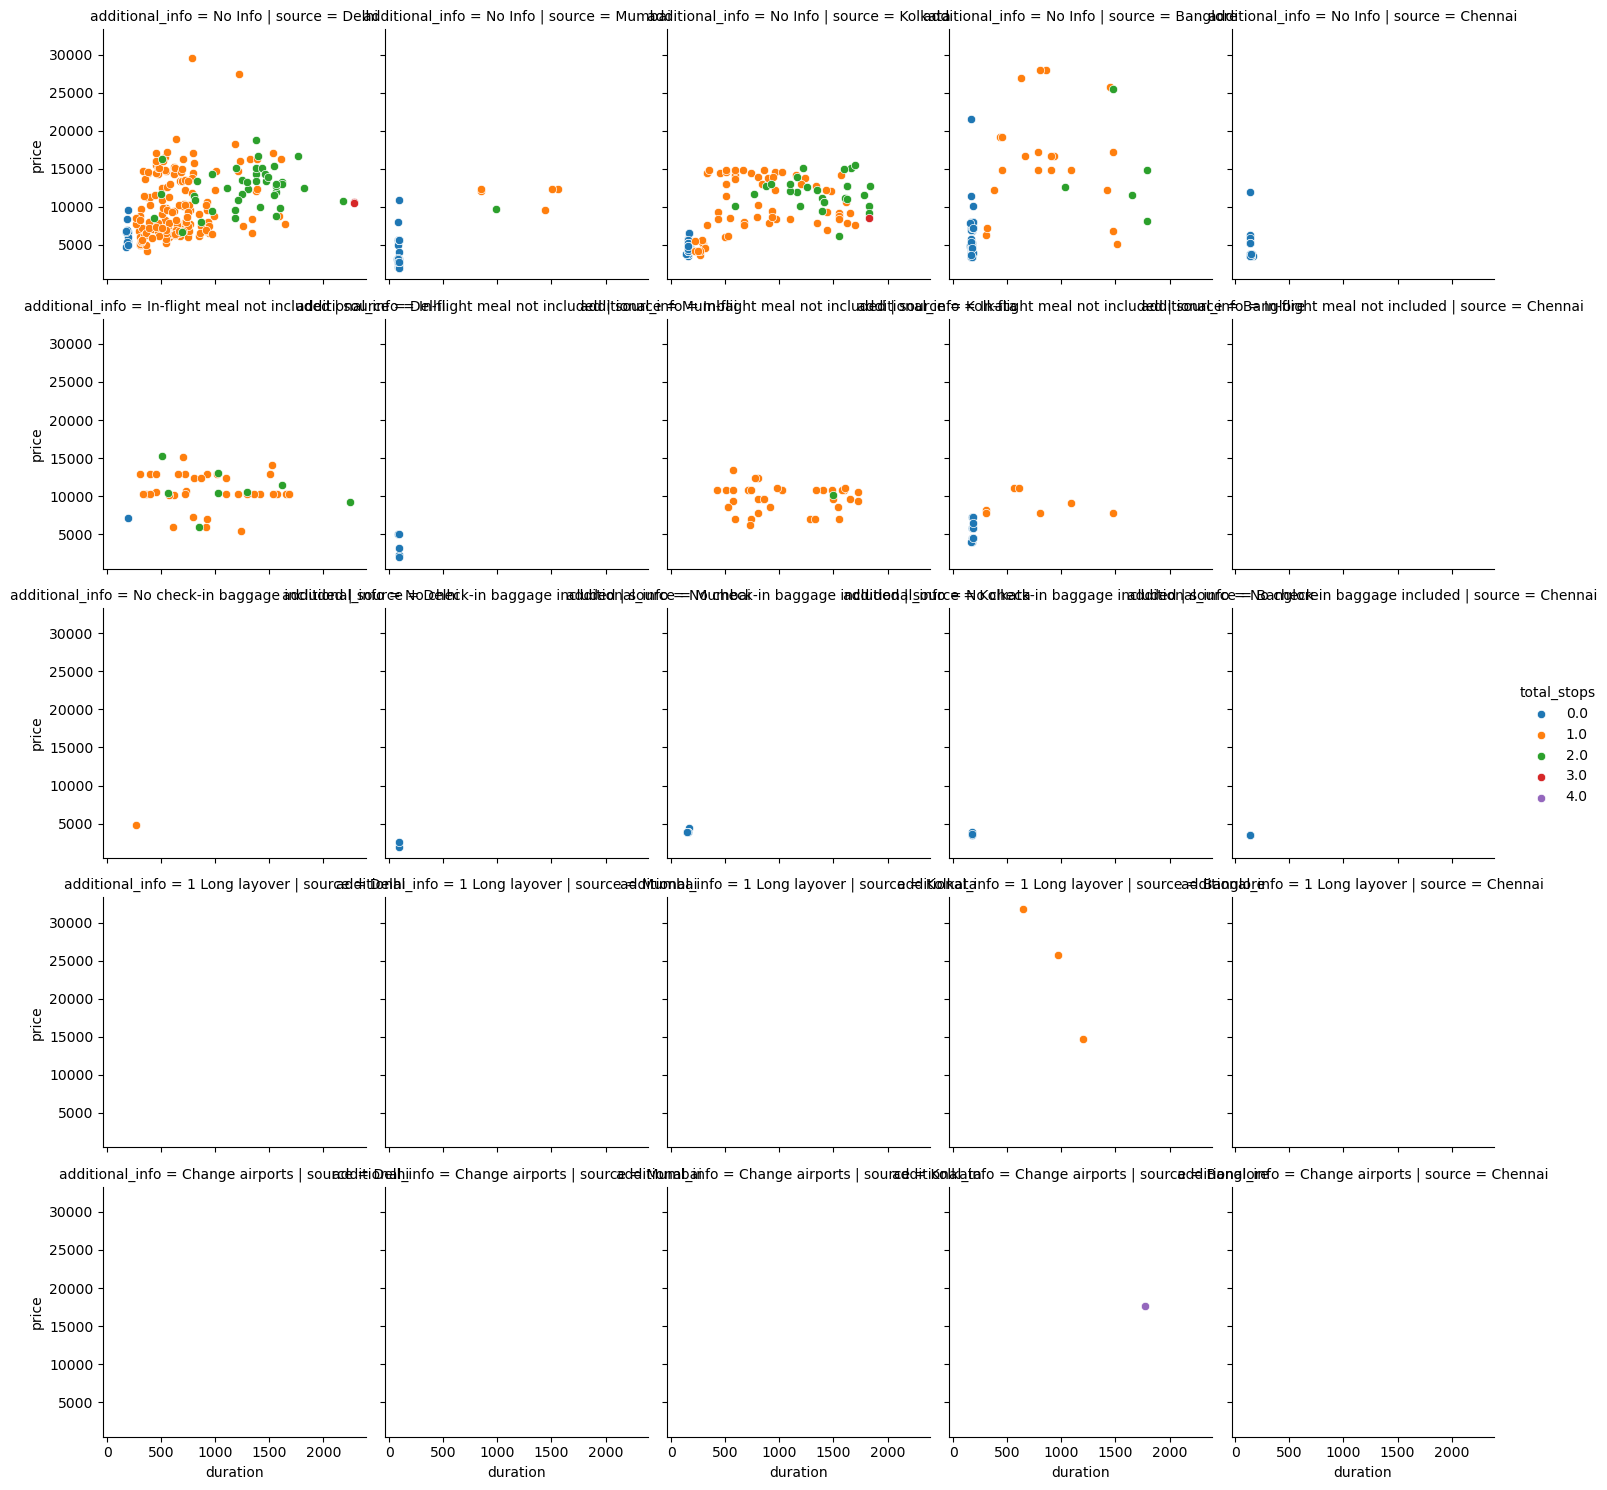

In [39]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [40]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -998.125
Upper Limit : 2116.875


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
52,Air India,2019-03-21,Delhi,Cochin,2025-08-12 06:50:00,2025-08-12 19:15:00,2185,2.0,No Info,10756
105,Jet Airways,2019-03-27,Delhi,Cochin,2025-08-12 06:20:00,2025-08-12 19:45:00,2245,2.0,In-flight meal not included,9296
151,Air India,2019-06-06,Delhi,Cochin,2025-08-12 05:15:00,2025-08-12 19:15:00,2280,3.0,No Info,10703
579,Air India,2019-06-24,Delhi,Cochin,2025-08-12 05:15:00,2025-08-12 19:15:00,2280,3.0,No Info,10493


In [41]:
eda_helper_functions.cat_summary(train, "additional_info")

0                          No Info
1                          No Info
2                          No Info
3      In-flight meal not included
4      In-flight meal not included
                  ...             
635                        No Info
636                        No Info
637                        No Info
638                        No Info
639                        No Info
Name: additional_info, Length: 640, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,5
top,No Info
freq,513


,count,percentage
category,,
No Info,513,0.801562
In-flight meal not included,108,0.168750
No check-in baggage included,15,0.023438
1 Long layover,3,0.004687
Change airports,1,0.001563


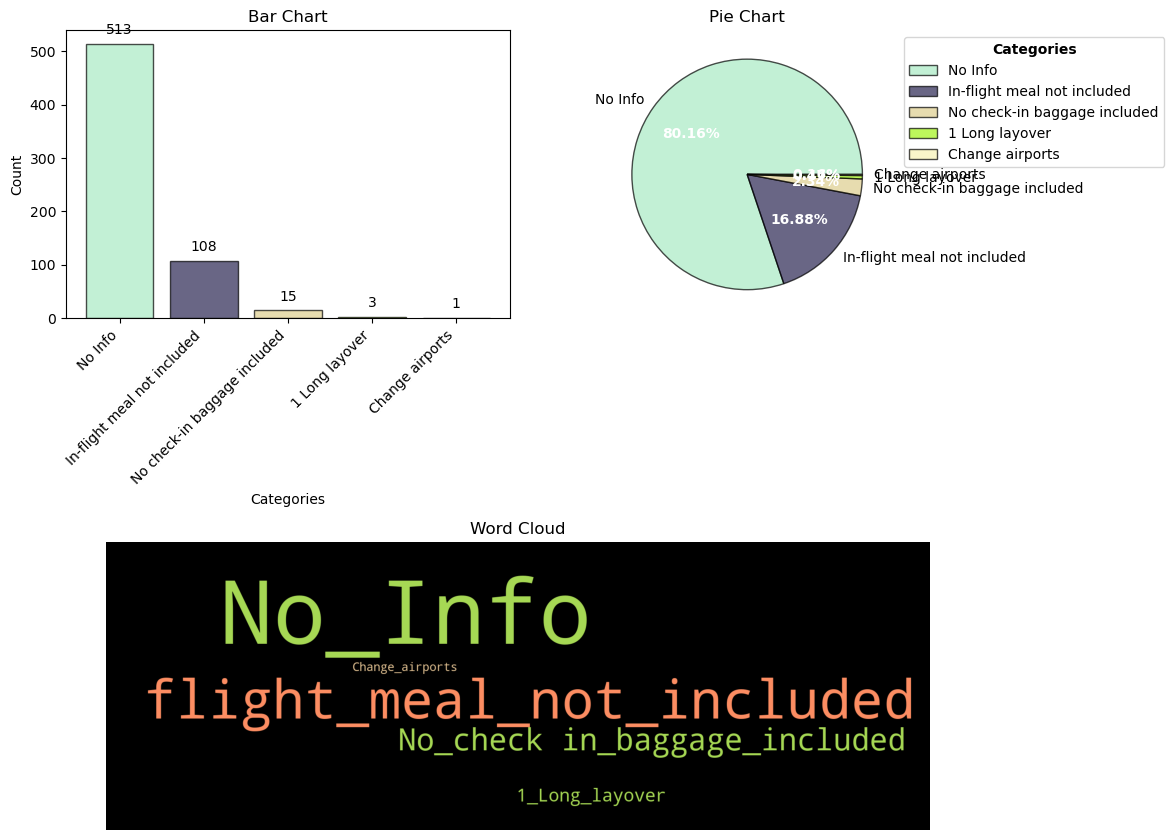

In [42]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

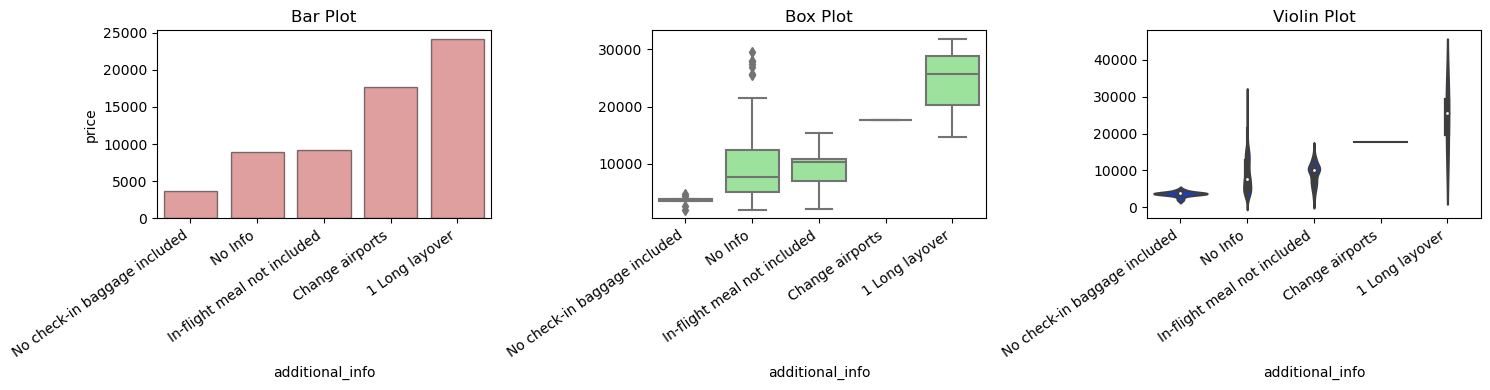

In [43]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

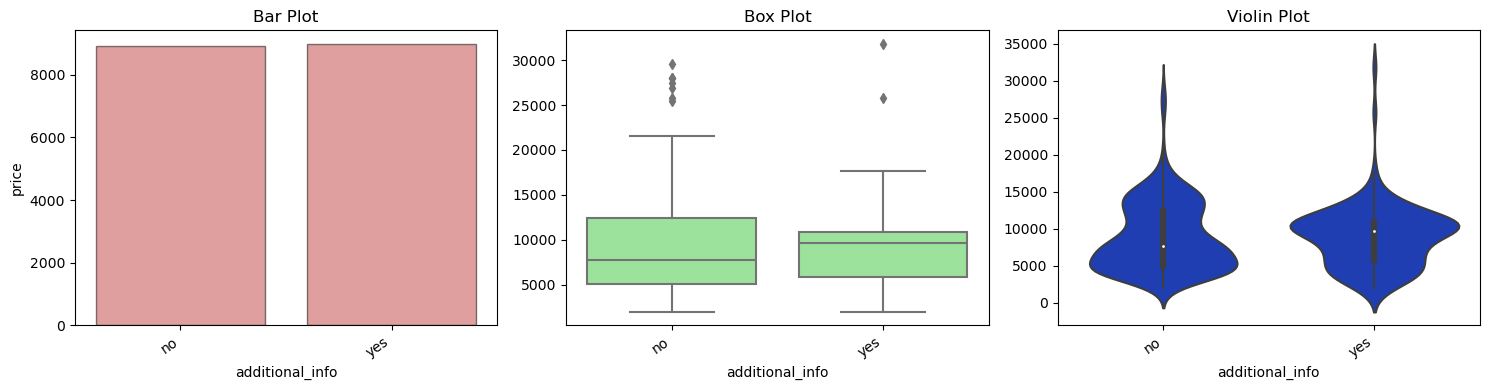

In [44]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)